In [44]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [45]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
tags = ["2024-05-17-17-00-12",
        "2024-05-23-21-19-27",
        "2024-05-25-14-57-05",
        "2024-05-26-15-54-09",
        ]
filters = {"tags": {"$in": tags}, "state": "finished"}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [46]:
# crete a dataframe from runs and summary metrics
# async def add_max_to_summary(run):
#     try:
#         history: pd.DataFrame = run.history()
#         # get the row with the highest Self_Play/Mean_Reward
#         metric = "Self_Play/Mean_Reward"
#         best_row = history.loc[history[metric].idxmax()]
#         run.summary[f'max_{metric}'] = best_row[metric]
#         run.summary[f'max_{metric}_step'] = best_row['_step']
#         run.summary.update()
#     except:
#         pass



# async def get_history(run):
#     return await run.history()

# tasks = []
# for run in runs:
#     if run.state != "finished":
#         continue
#     tasks.append(add_max_to_summary(run))

# await asyncio.gather(*tasks)


data = []
for run in tqdm(runs):
    history: pd.DataFrame = run.history()
    for i, row in history.iterrows():
        # add a row to the data with run.config and the history row merged
        data.append({**run.config, **row})

df = pd.DataFrame(data)

df


100%|██████████| 120/120 [01:13<00:00,  1.64it/s]


,ncols,layers,puct_c,workers,lr_gamma,dir_alpha,eval_temp,env_params,eval_param,hidden_dim,...,Self_Play/Mean_Timesteps,Self_Play/Mean_Discounted_Return,Training/Learning_Rate,environment_steps,Self_Play/Timesteps,Self_Play/Mean_Return,Self_Play/Entropies,Self_Play/EMA_Discounted_Return,Self_Play/Total_Mean_Discounted_Return,Self_Play/Discounted_Return
0,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,87.500000,0.024788,0.0002,525,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.333333,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.024788,0.024788,"{'values': [4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0..."
1,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,98.333333,0.001735,0.0002,1115,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.166667,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.017872,0.013261,{'packedBins': {'size': 0.00016263739962596446...
2,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,79.000000,0.064725,0.0002,1589,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.333333,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.031928,0.030416,"{'packedBins': {'count': 64, 'min': 0, 'size':..."
3,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,53.500000,0.131370,0.0002,1910,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.833333,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.061761,0.055655,"{'packedBins': {'size': 0.005601340904831886, ..."
4,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,72.333333,0.055810,0.0002,2344,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.666667,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.059975,0.055686,"{'_type': 'histogram', 'values': [2, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': None, 'map_nam...",10,64,...,89.500000,-0.026297,0.0002,14545,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-0.166667,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",-0.023381,-0.020566,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ..."
3596,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': None, 'map_nam...",10,64,...,99.833333,-0.001093,0.0002,15144,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-0.166667,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",-0.016694,-0.019845,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ..."
3597,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': None, 'map_nam...",10,64,...,100.000000,0.000000,0.0002,15744,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.000000,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",-0.011686,-0.019136,"{'values': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
3598,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': None, 'map_nam...",10,64,...,86.000000,-0.077215,0.0002,16260,"{'packedBins': {'count': 64, 'min': 16, 'size'...",-0.166667,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",-0.031345,-0.021139,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."


In [47]:
df.columns

Index(['ncols', 'layers', 'puct_c', 'workers', 'lr_gamma', 'dir_alpha',
       'eval_temp', 'env_params', 'eval_param', 'hidden_dim', 'iterations',
       'model_type', 'norm_layer', 'dir_epsilon', 'worst_value',
       'activation_fn', 'learning_rate', 'optimal_value', 'discount_factor',
       'env_description', 'planning_budget', 'training_epochs',
       'use_visit_count', 'n_steps_learning', 'selection_policy',
       'tree_temperature', 'value_loss_weight', 'max_episode_length',
       'policy_loss_weight', 'sample_batch_ratio', 'tree_value_transform',
       'observation_embedding', 'regularization_weight',
       'root_selection_policy', 'episodes_per_iteration',
       'tree_evaluation_policy', 'replay_buffer_multiplier',
       'selection_value_transform', '_step', 'Training/Value_loss',
       '_timestamp', 'Training/Replay_Buffer_Size', 'Evaluation/Returns',
       'Self_Play/Total_Timesteps', '_runtime', 'Training/Regularization_loss',
       'Training/Policy_loss', 'grad_

In [48]:
save_folder = 'outfiles'


def name_fn(name):
    # remove "Self_Play/" prefix if it exists
    if name.startswith("Self_Play/"):
        name = name[len("Self_Play/"):]

    # replace slash with underscore
    name = name.replace("/", "_")

    # change underscore to space
    name = name.replace("_", " ")
    return name

In [49]:
episode_max = df['episodes'].max()
# if episodes is Nan, set it to episode_max
df['episodes'] = df['episodes'].fillna(episode_max)

/var/folders/lk/nt9x15z12v3_kjy4_vwkcf_r0000gn/T/ipykernel_28508/1650598092.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['policy_combination'] = df['policy_combination'].map(policy_combination_mapping)


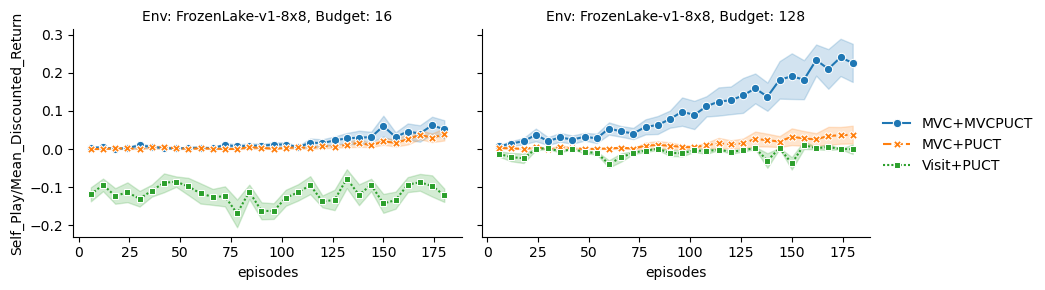

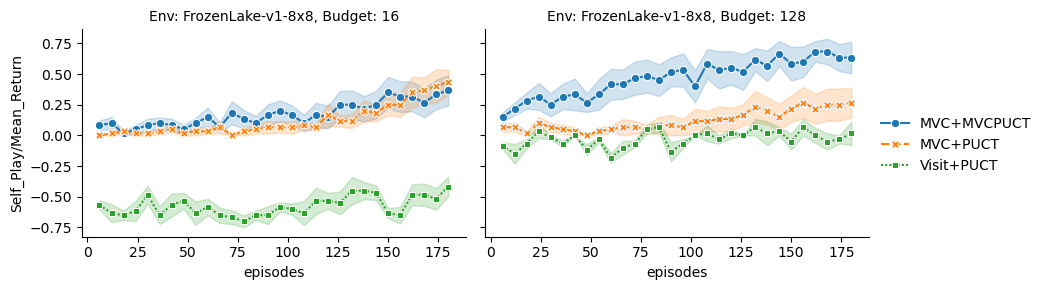

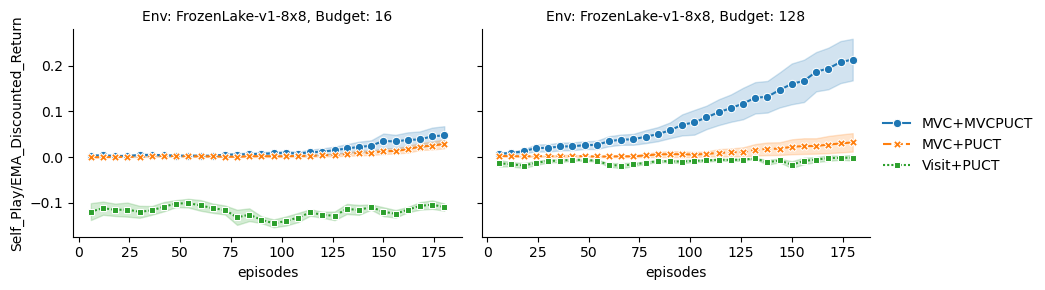

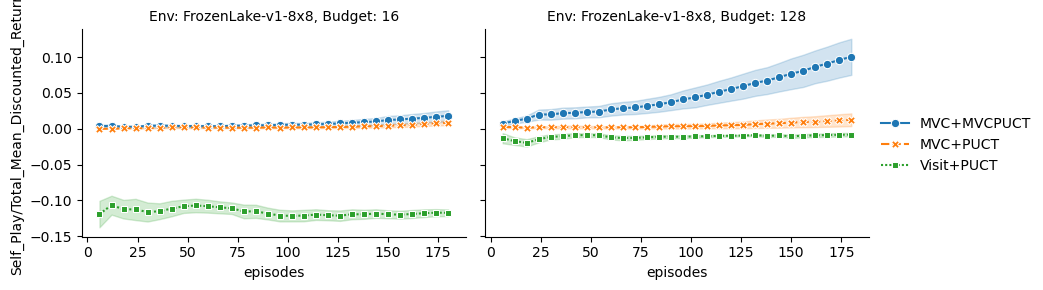

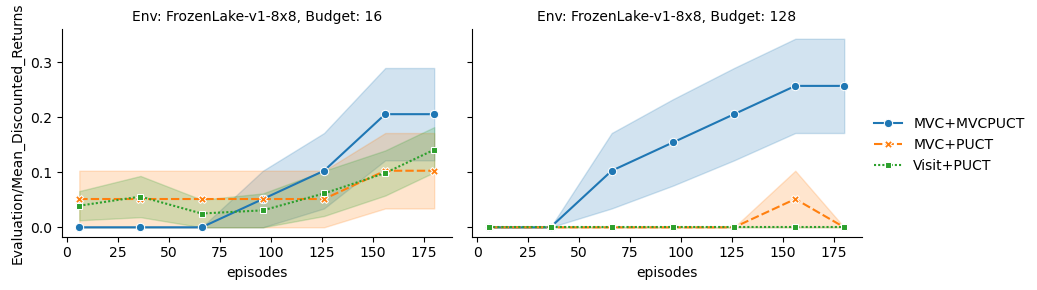

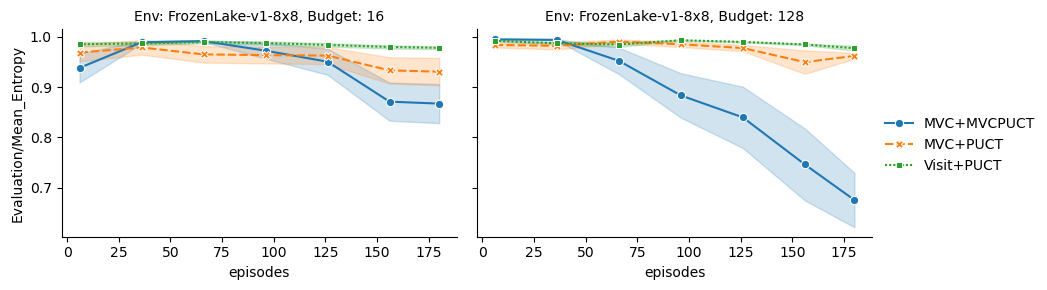

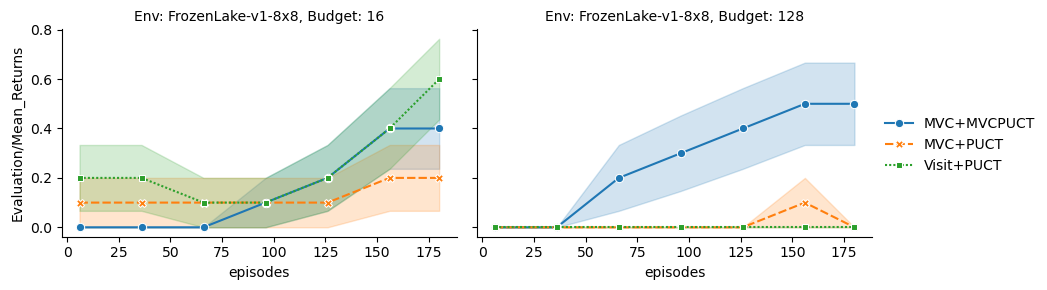

In [50]:





df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']
policy_combination_mapping = {
    'mvc+PolicyPUCT': 'MVC+MVCPUCT',
    'mvc+PUCT': 'MVC+PUCT',
    'visit+PUCT': 'Visit+PUCT'
}
df = df[df["planning_budget"].isin([16, 128])]

# Rename the policy combinations in the DataFrame
df['policy_combination'] = df['policy_combination'].map(policy_combination_mapping)
metrics = ['Self_Play/Mean_Discounted_Return','Self_Play/Mean_Return', 'Self_Play/EMA_Discounted_Return', 'Self_Play/Total_Mean_Discounted_Return',
           "Evaluation/Mean_Discounted_Returns", "Evaluation/Mean_Entropy", "Evaluation/Mean_Returns"]
x_metric = "episodes"

estimator = "mean"

for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed


    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend()
    g.set_titles("Env: {row_name}, Budget: {col_name}")


    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)
    # increase the width of the plot
    # g.fig.set_figwidth(10)
    # plt.suptitle(metric)
    # plt.tight_layout()
    plt.show()

In [51]:
max_episode_length = df["max_episode_length"].max()
max_episode_length

100

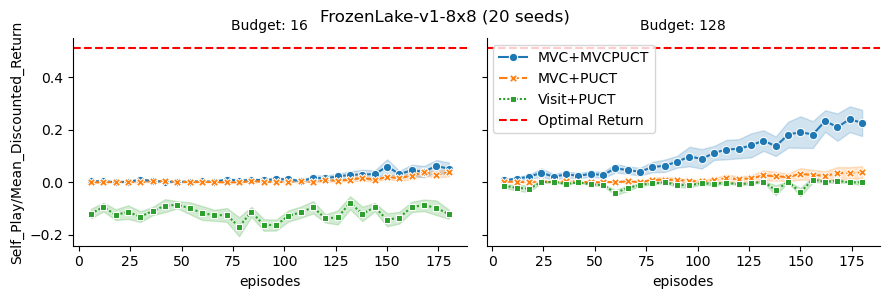

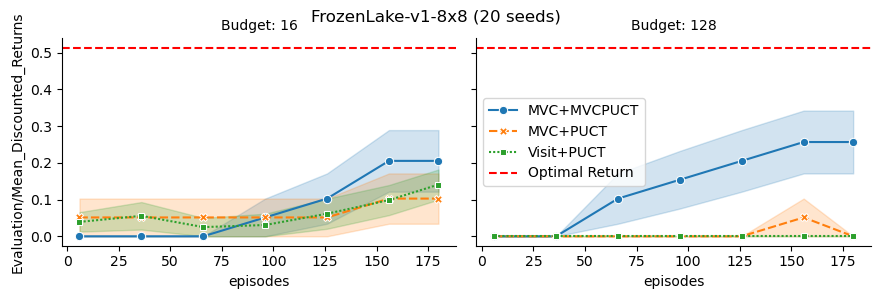

In [52]:
from matplotlib.lines import Line2D


env_description = "FrozenLake-v1-8x8"
env_runs = df[df["env_description"] == env_description]
optimum_value = env_runs["optimal_value"][0]

metrics = ["Self_Play/Mean_Discounted_Return", "Evaluation/Mean_Discounted_Returns"]

estimator = "mean"
nseeds = int(len(runs) / df["planning_budget"].nunique() / df["policy_combination"].nunique() / df["env_description"].nunique())
for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

    # add a horizontal line for the optimal value to each subplot

    for ax in g.axes.flat:
        ax.axhline(optimum_value, ls="--", color="red")



    # Step 3: Adjusting aesthetics (optional)
    g.set_titles("Budget: {col_name}")
    # add title
    g.fig.suptitle(f"{env_description} ({nseeds} seeds)")


    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)


    # Add custom legend
    legend_elements = [Line2D([0], [0], color='red', linestyle='--', label='Optimal Return')]
    # Extend existing legend handles and labels
    handles, labels = g.axes.flat[-1].get_legend_handles_labels()
    handles.extend(legend_elements)

    # Place the legend on the last subplot
    g.axes.flat[-1].legend(handles=handles)
    # save as pdf
    plt.savefig(f"{save_folder}/{env_description}_{metric.replace('/', '_')}.pdf")



    plt.show()


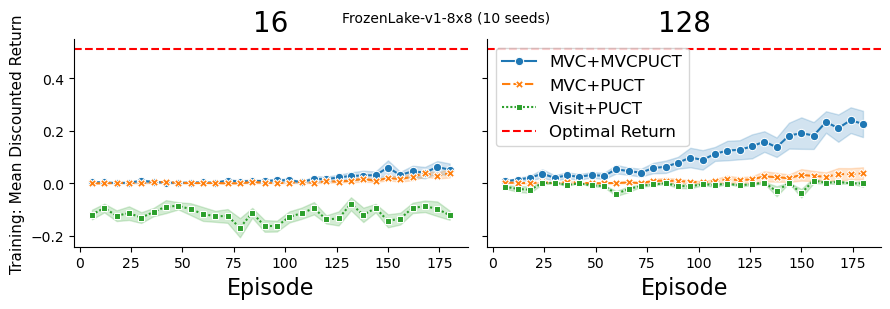

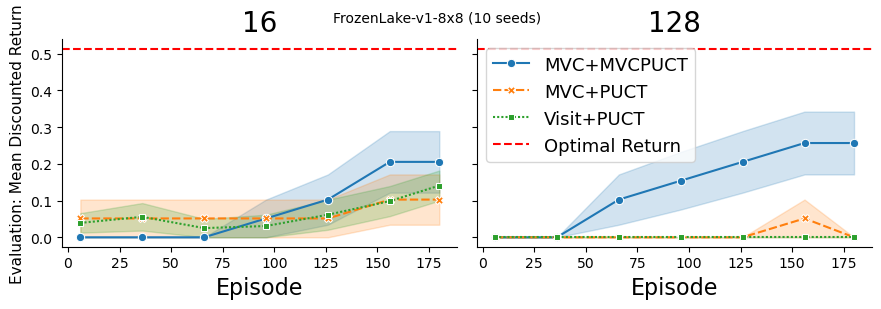

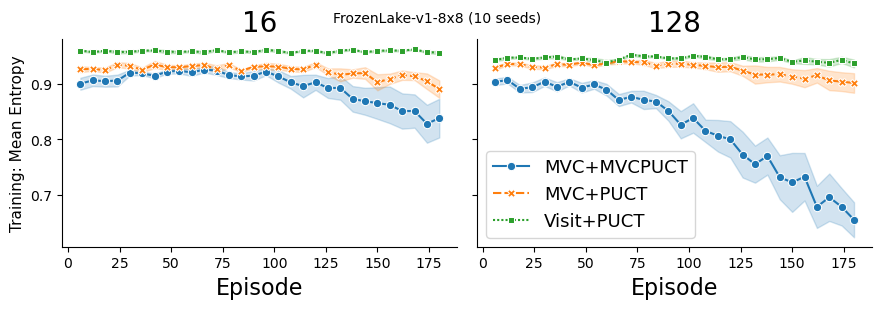

In [70]:
from matplotlib.lines import Line2D


env_description = "FrozenLake-v1-8x8"

env_runs = df[df["env_description"] == env_description]
optimum_value = env_runs["optimal_value"][0]

metrics = ["Self_Play/Mean_Discounted_Return", "Evaluation/Mean_Discounted_Returns", "Self_Play/Mean_Entropy"]

metric_display_names = {
    "Self_Play/Mean_Discounted_Return": "Training: Mean Discounted Return",
    "Evaluation/Mean_Discounted_Returns": "Evaluation: Mean Discounted Return",
    "Self_Play/Mean_Entropy": "Training: Mean Entropy",
}

estimator = "mean"
nseeds = int(len(runs) / df["planning_budget"].nunique() / df["policy_combination"].nunique() / df["env_description"].nunique()) // 2
for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
    # Note: adjust size and aspect to fit your data and preference
    # only include budget 16 and 128

    g = sns.FacetGrid(data=df
                      , row="env_description", col="planning_budget", sharex="col", aspect=1.5)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

    # add a horizontal line for the optimal value to each subplot
    if metric != "Self_Play/Mean_Entropy":

        for ax in g.axes.flat:
            ax.axhline(optimum_value, ls="--", color="red")



    # Step 3: Adjusting aesthetics (optional)
    g.set_titles("{col_name}", size=20)
    # add title
    g.fig.suptitle(f"{env_description} ({nseeds} seeds)", fontsize=10)

    # increase the font size of the x and y labels
    g.set_ylabels(fontsize=11)
    g.set_xlabels(fontsize=16)


    # Adjust the labels/titles as needed
    g.set_axis_labels("Episode", metric_display_names[metric])

    if metric != "Self_Play/Mean_Entropy":

        # Add custom legend
        legend_elements = [Line2D([0], [0], color='red', linestyle='--', label='Optimal Return')]
        # Extend existing legend handles and labels
        handles, labels = g.axes.flat[-1].get_legend_handles_labels()
        handles.extend(legend_elements)
        # make axis titles larger

        if metric == "Self_Play/Mean_Discounted_Return":
            size = 12
        else:
            size = 13
        g.axes.flat[-1].legend(handles=handles, fontsize=size)

    else:
        handles, labels = g.axes.flat[-1].get_legend_handles_labels()
        g.axes.flat[-1].legend(handles=handles, fontsize=13)
    # save as pdf
    plt.savefig(f"{save_folder}/{env_description}_{metric.replace('/', '_')}_small.pdf", bbox_inches='tight')


    plt.show()


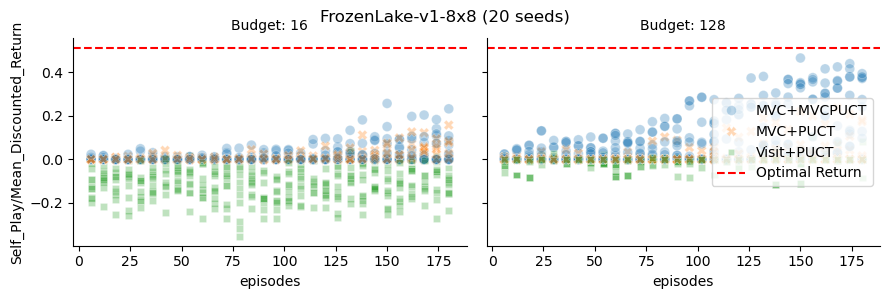

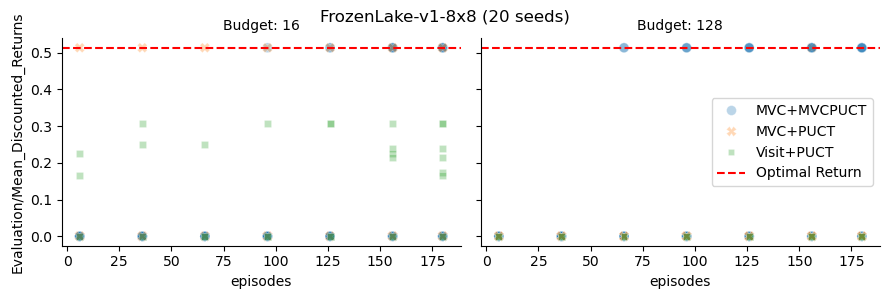

In [54]:
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt


metrics = ["Self_Play/Mean_Discounted_Return", "Evaluation/Mean_Discounted_Returns"]

nseeds = int(len(runs) / df["planning_budget"].nunique() / df["policy_combination"].nunique() / df["env_description"].nunique())
for metric in metrics:
    # Step 1: Set up the FacetGrid
    g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the scatter plots on each subplot
    g.map_dataframe(sns.scatterplot,
                    x=x_metric, y=metric,
                    hue="policy_combination", style="policy_combination",
                    s=50, alpha=0.3)  # 's' controls the size of the points; adjust as needed

    # Add a horizontal line for the optimal value to each subplot
    for ax in g.axes.flat:
        ax.axhline(optimum_value, ls="--", color="red")

    # Step 3: Adjusting aesthetics
    g.set_titles("Budget: {col_name}")
    g.fig.suptitle(f"{env_description} ({nseeds} seeds)")
    g.set_axis_labels(x_metric, metric)

    # Add custom legend
    legend_elements = [Line2D([0], [0], color='red', linestyle='--', label='Optimal Return')]
    handles, labels = g.axes.flat[-1].get_legend_handles_labels()
    handles.extend(legend_elements)
    g.axes.flat[-1].legend(handles=handles, loc='center right')

    # Save as pdf
    # plt.savefig(f"{save_folder}/{env_description}_{metric.replace('/', '_')}_dist.pdf")

    plt.show()


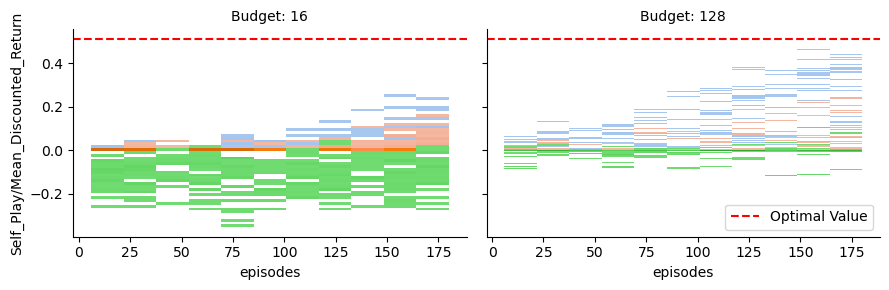

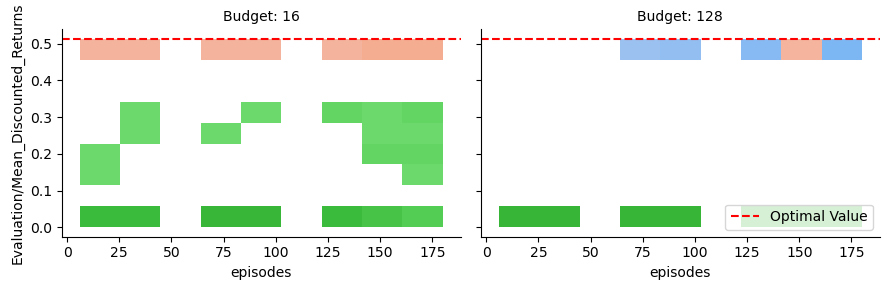

In [55]:
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt


metrics = ["Self_Play/Mean_Discounted_Return", "Evaluation/Mean_Discounted_Returns"]


nseeds = int(len(runs) / df["planning_budget"].nunique() / df["policy_combination"].nunique() / df["env_description"].nunique())
for metric in metrics:
    # Step 1: Set up the FacetGrid
    g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the histograms on each subplot
    g.map_dataframe(sns.histplot,
                    x=x_metric, y=metric,
                    hue="policy_combination",
                    element="step", fill=False)  # 'element' can be 'bars', 'step', 'poly'; 'fill' controls whether to fill under the histogram

    # Add a horizontal line for the optimal value to each subplot
    for ax in g.axes.flat:
        ax.axhline(optimum_value, ls="--", color="red")

    # Step 3: Adjusting aesthetics
    g.set_titles("Budget: {col_name}")
    g.set_axis_labels(x_metric, metric)

    # Add custom legend
    legend_elements = [Line2D([0], [0], color='red', linestyle='--', label='Optimal Value')]
    handles, labels = g.axes.flat[-1].get_legend_handles_labels()
    handles.extend(legend_elements)
    g.axes.flat[-1].legend(handles=handles, loc='lower right')

    # Save as pdf
    # plt.savefig(f"{save_folder}/{env_description}_{metric.replace('/', '_')}.pdf")

    plt.show()


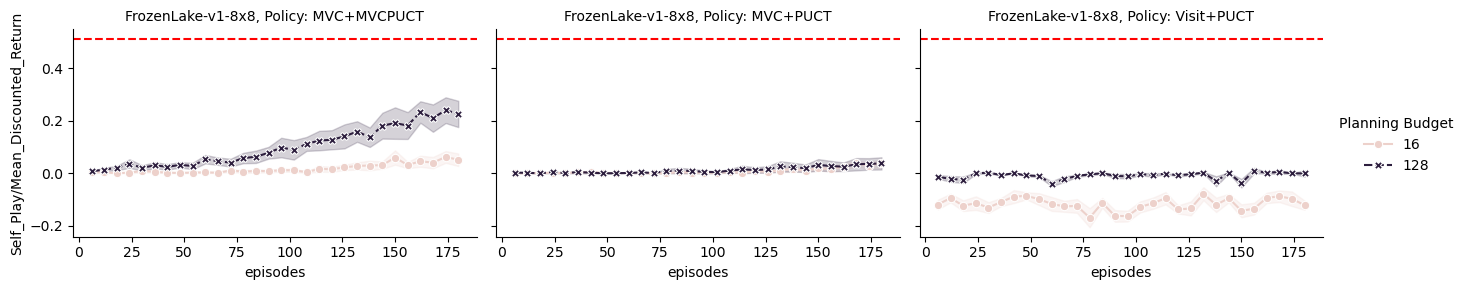

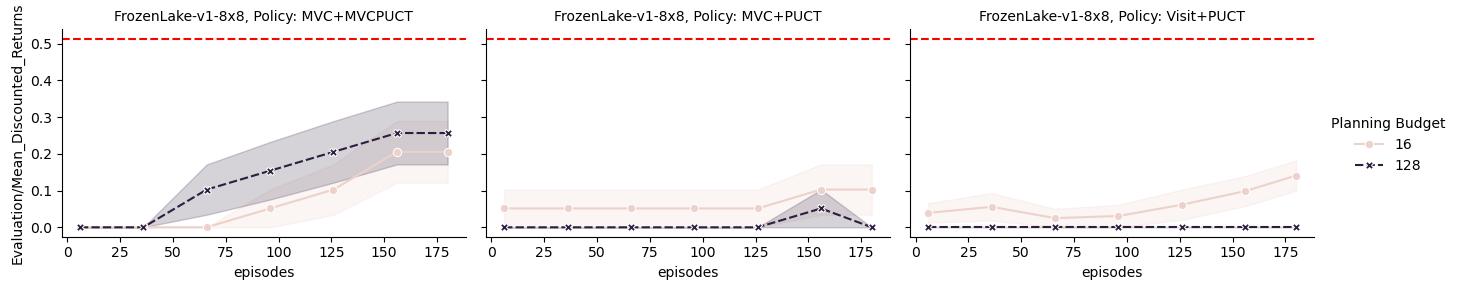

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' and 'metrics' are already defined and loaded properly

for metric in metrics:
    # Step 1: Set up the FacetGrid to create one subplot for each unique value in 'policy_combination'
    g = sns.FacetGrid(data=df, row="env_description", col="policy_combination", sharex="col", sharey="row", aspect=1.5)

    # Step 2: Use map_dataframe to draw the lineplots on each subplot
    # Pass sns.lineplot as the plotting function and its arguments
    g.map_dataframe(sns.lineplot,
                    x=x_metric, y=metric,
                    hue="planning_budget", style="planning_budget",
                    markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

    # Add a horizontal line for the optimal value to each subplot
    for ax in g.axes.flat:
        ax.axhline(optimum_value, ls="--", color="red")

    # Step 3: Adjusting aesthetics (optional)
    # Adding a legend
    g.add_legend(title="Planning Budget")
    g.set_titles("{row_name}, Policy: {col_name}")

    # Adjust the labels/titles as needed
    g.set_axis_labels(x_metric, metric)

    plt.show()


In [57]:
df.columns

Index(['ncols', 'layers', 'puct_c', 'workers', 'lr_gamma', 'dir_alpha',
       'eval_temp', 'env_params', 'eval_param', 'hidden_dim', 'iterations',
       'model_type', 'norm_layer', 'dir_epsilon', 'worst_value',
       'activation_fn', 'learning_rate', 'optimal_value', 'discount_factor',
       'env_description', 'planning_budget', 'training_epochs',
       'use_visit_count', 'n_steps_learning', 'selection_policy',
       'tree_temperature', 'value_loss_weight', 'max_episode_length',
       'policy_loss_weight', 'sample_batch_ratio', 'tree_value_transform',
       'observation_embedding', 'regularization_weight',
       'root_selection_policy', 'episodes_per_iteration',
       'tree_evaluation_policy', 'replay_buffer_multiplier',
       'selection_value_transform', '_step', 'Training/Value_loss',
       '_timestamp', 'Training/Replay_Buffer_Size', 'Evaluation/Returns',
       'Self_Play/Total_Timesteps', '_runtime', 'Training/Regularization_loss',
       'Training/Policy_loss', 'grad_

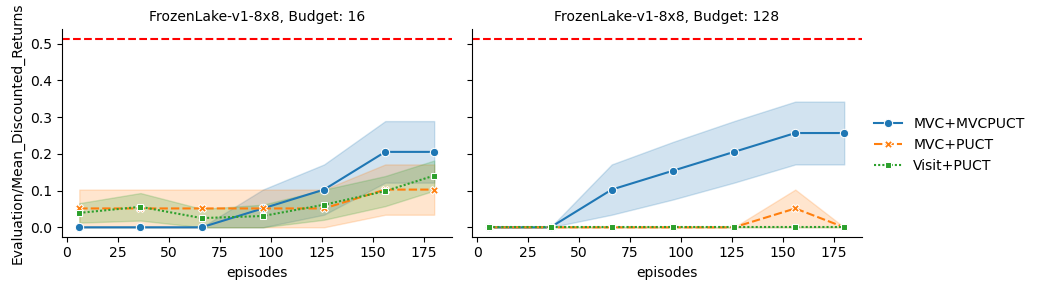

In [58]:
metric = "Evaluation/Mean_Discounted_Returns"
max_episode_length = 100
estimator = "mean"

# Step 1: Set up the FacetGrid to create one subplot for each unique value in 'env_description'
# Note: adjust size and aspect to fit your data and preference
g = sns.FacetGrid(data=df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)

# Step 2: Use map_dataframe to draw the lineplots on each subplot
# Pass sns.lineplot as the plotting function and its arguments
g.map_dataframe(sns.lineplot,
                x=x_metric, y=metric,
                hue="policy_combination", style="policy_combination",
                markers=True, errorbar="se", estimator="mean")  # adjust 'estimator' as needed

# add a horizontal line for the optimal value to each subplot

for ax in g.axes.flat:
    ax.axhline(optimum_value, ls="--", color="red")



# Step 3: Adjusting aesthetics (optional)
# Adding a legend
g.add_legend()
g.set_titles("{row_name}, Budget: {col_name}")

# Adjust the labels/titles as needed
g.set_axis_labels(x_metric, metric)


plt.show()

In [59]:
df.columns

Index(['ncols', 'layers', 'puct_c', 'workers', 'lr_gamma', 'dir_alpha',
       'eval_temp', 'env_params', 'eval_param', 'hidden_dim', 'iterations',
       'model_type', 'norm_layer', 'dir_epsilon', 'worst_value',
       'activation_fn', 'learning_rate', 'optimal_value', 'discount_factor',
       'env_description', 'planning_budget', 'training_epochs',
       'use_visit_count', 'n_steps_learning', 'selection_policy',
       'tree_temperature', 'value_loss_weight', 'max_episode_length',
       'policy_loss_weight', 'sample_batch_ratio', 'tree_value_transform',
       'observation_embedding', 'regularization_weight',
       'root_selection_policy', 'episodes_per_iteration',
       'tree_evaluation_policy', 'replay_buffer_multiplier',
       'selection_value_transform', '_step', 'Training/Value_loss',
       '_timestamp', 'Training/Replay_Buffer_Size', 'Evaluation/Returns',
       'Self_Play/Total_Timesteps', '_runtime', 'Training/Regularization_loss',
       'Training/Policy_loss', 'grad_

In [60]:
eval_data = df[df["Evaluation/Trajectories"].notnull()].copy()
eval_data[["episodes", "Evaluation/Trajectories"]]

,episodes,Evaluation/Trajectories
0,6,"[[0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7,..."
5,36,"[[0, 1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 7, 7, 7,..."
10,66,"[[0, 1, 2, 3, 4, 5, 6, 7, 15, 23, 31, 39, 47, ..."
15,96,"[[0, 1, 2, 3, 4, 5, 6, 7, 15, 23, 31, 39, 47, ..."
20,126,"[[0, 1, 2, 3, 4, 5, 6, 14, 22, 30, 31, 39, 47,..."
...,...,...
3550,66,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3555,96,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3560,126,"[[0, 1, 2, 3, 4, 5, 13, 5, 13, 5, 13, 5, 13, 5..."
3565,156,"[[0, 8, 16, 24, 32, 40, 48, 56, 56, 56, 56, 56..."


[]

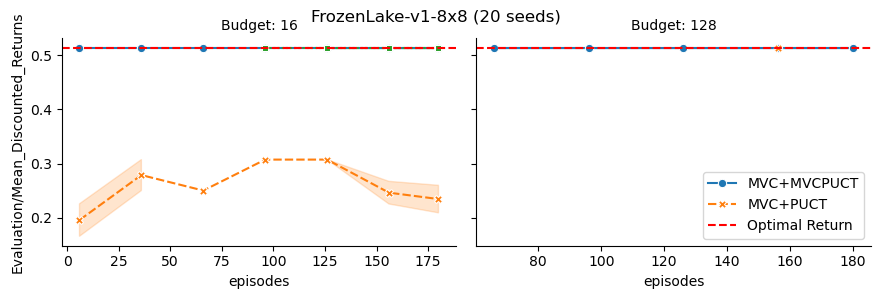

In [61]:
# eval_data only if Evaluation/Trajectories is not None
eval_data['max_length_reached'] = eval_data['Evaluation/Trajectories'].apply(lambda x: len(x[0]) == max_episode_length)

# Filtered DataFrame for plotting without the max_length_reached datapoints
filtered_df = eval_data[~eval_data['max_length_reached']]


# Set up the FacetGrid using the filtered DataFrame
g = sns.FacetGrid(data=filtered_df, row="env_description", col="planning_budget", sharex="col", sharey="row", aspect=1.5)
g.map_dataframe(sns.lineplot,
                x=x_metric, y=metric,
                hue="policy_combination", style="policy_combination",
                markers=True, errorbar="se", estimator=estimator)

# Adding the optimal value horizontal line
for ax in g.axes.flat:
    ax.axhline(optimum_value, ls="--", color="red")

# Step 3: Adjusting aesthetics
g.set_titles("Budget: {col_name}")
g.fig.suptitle(f"{env_description} ({nseeds} seeds)")
g.set_axis_labels(x_metric, metric)



# Add custom legend
legend_elements = [Line2D([0], [0], color='red', linestyle='--', label='Optimal Return')]
handles, labels = g.axes.flat[-1].get_legend_handles_labels()
handles.extend(legend_elements)
g.axes.flat[-1].legend(handles=handles, loc='lower right')


# Save as pdf
plt.savefig(f"{save_folder}/{env_description}_{metric.replace('/', '_')}_speed.pdf")
plt.plot()

In [62]:
filtered_df

,ncols,layers,puct_c,workers,lr_gamma,dir_alpha,eval_temp,env_params,eval_param,hidden_dim,...,Training/Learning_Rate,environment_steps,Self_Play/Timesteps,Self_Play/Mean_Return,Self_Play/Entropies,Self_Play/EMA_Discounted_Return,Self_Play/Total_Mean_Discounted_Return,Self_Play/Discounted_Return,policy_combination,max_length_reached
10,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,0.0002,4602,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.833333,"{'packedBins': {'min': 0.6508997678756714, 'si...",0.084283,0.070225,"{'values': [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0...",MVC+MVCPUCT,False
15,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,0.0002,5905,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",1.000000,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.175237,0.099262,"{'packedBins': {'count': 64, 'min': 0.17482453...",MVC+MVCPUCT,False
20,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,0.0002,6883,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",1.000000,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.224702,0.131385,"{'packedBins': {'size': 0.00590677501168102, '...",MVC+MVCPUCT,False
25,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,0.0002,7735,"{'_type': 'histogram', 'values': [2, 0, 0, 0, ...",1.000000,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.285685,0.161380,"{'packedBins': {'size': 0.0028559749480336905,...",MVC+MVCPUCT,False
29,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,0.0002,8274,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",1.000000,"{'values': [2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0...",0.341078,0.186160,"{'packedBins': {'size': 0.0031609339639544487,...",MVC+MVCPUCT,False
325,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,0.0002,14751,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.500000,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.033107,0.010133,"{'_type': 'histogram', 'values': [3, 0, 0, 0, ...",MVC+PUCT,False
329,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,0.0002,16306,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.666667,"{'bins': [0.8079128861427307, 0.80906128883361...",0.054322,0.018266,"{'values': [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",MVC+PUCT,False
359,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,0.0002,11684,"{'_type': 'histogram', 'values': [1, 0, 0, 1, ...",-0.833333,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",-0.141881,-0.099449,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1...",Visit+PUCT,False
625,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,0.0002,14781,"{'packedBins': {'min': 38, 'size': 0.96875, 'c...",0.500000,"{'bins': [0.7596734762191772, 0.76153242588043...",0.041373,0.011272,"{'packedBins': {'min': 0, 'size': 0.0023420341...",MVC+MVCPUCT,False
629,8,2,1,1,1,2.5,0,"{'id': 'FrozenLake-v1', 'desc': ['SFFFFFFF', '...",10,64,...,0.0002,16402,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.666667,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",0.068417,0.019629,"{'packedBins': {'min': 0, 'size': 0.0025950516...",MVC+MVCPUCT,False


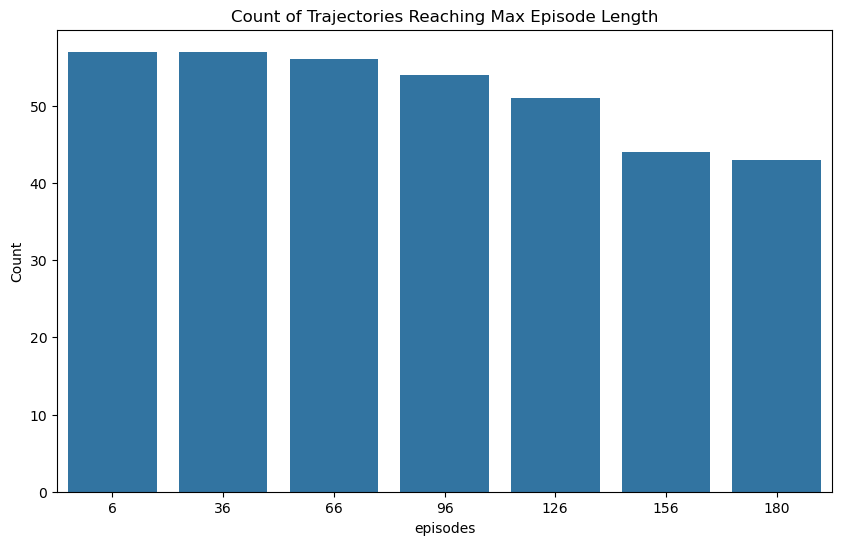

In [63]:
# Aggregate the data to count how many reach the max episode length at each x_metric
aggregated_data = eval_data.groupby(x_metric)['max_length_reached'].sum().reset_index()

# Create a new figure for the additional plot
plt.figure(figsize=(10, 6))
sns.barplot(data=aggregated_data, x=x_metric, y='max_length_reached')
plt.title('Count of Trajectories Reaching Max Episode Length')
plt.ylabel('Count')
plt.xlabel(x_metric)
plt.show()


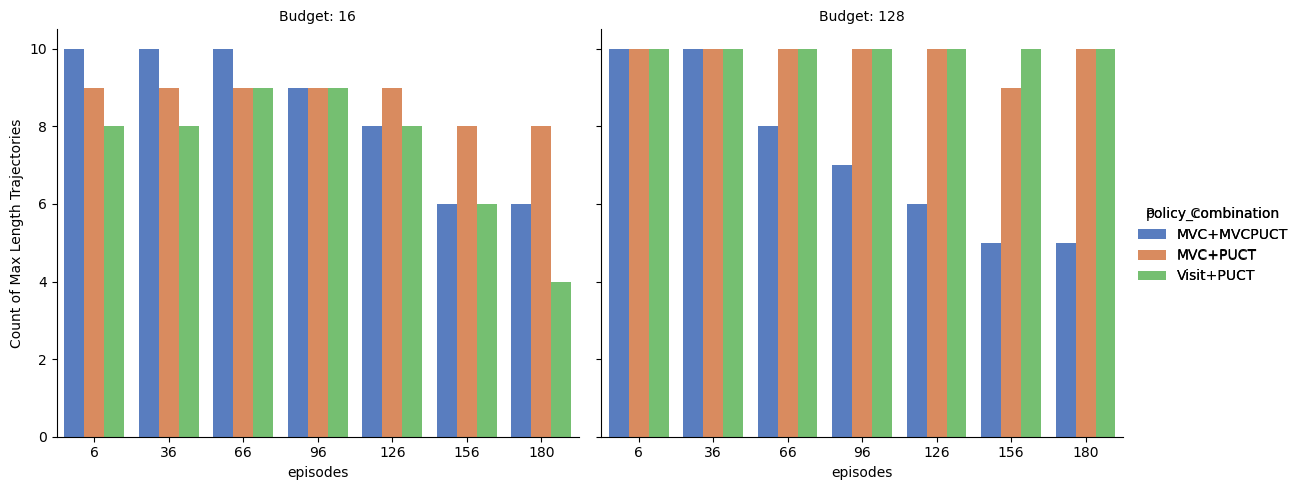

In [64]:
# Adjusting the code to group by x_metric, policy_combination, and planning_budget
aggregated_data = eval_data.groupby([x_metric, 'policy_combination', 'planning_budget'])['max_length_reached'].sum().reset_index()

# Create a faceted bar plot using seaborn's catplot
g = sns.catplot(
    data=aggregated_data,
    kind="bar",
    x=x_metric,
    y='max_length_reached',
    hue='policy_combination',
    col='planning_budget',
    palette='muted',
)

g.set_titles("Budget: {col_name}")
g.set_axis_labels(x_metric, "Count of Max Length Trajectories")
g.add_legend(title="Policy Combination")
plt.show()


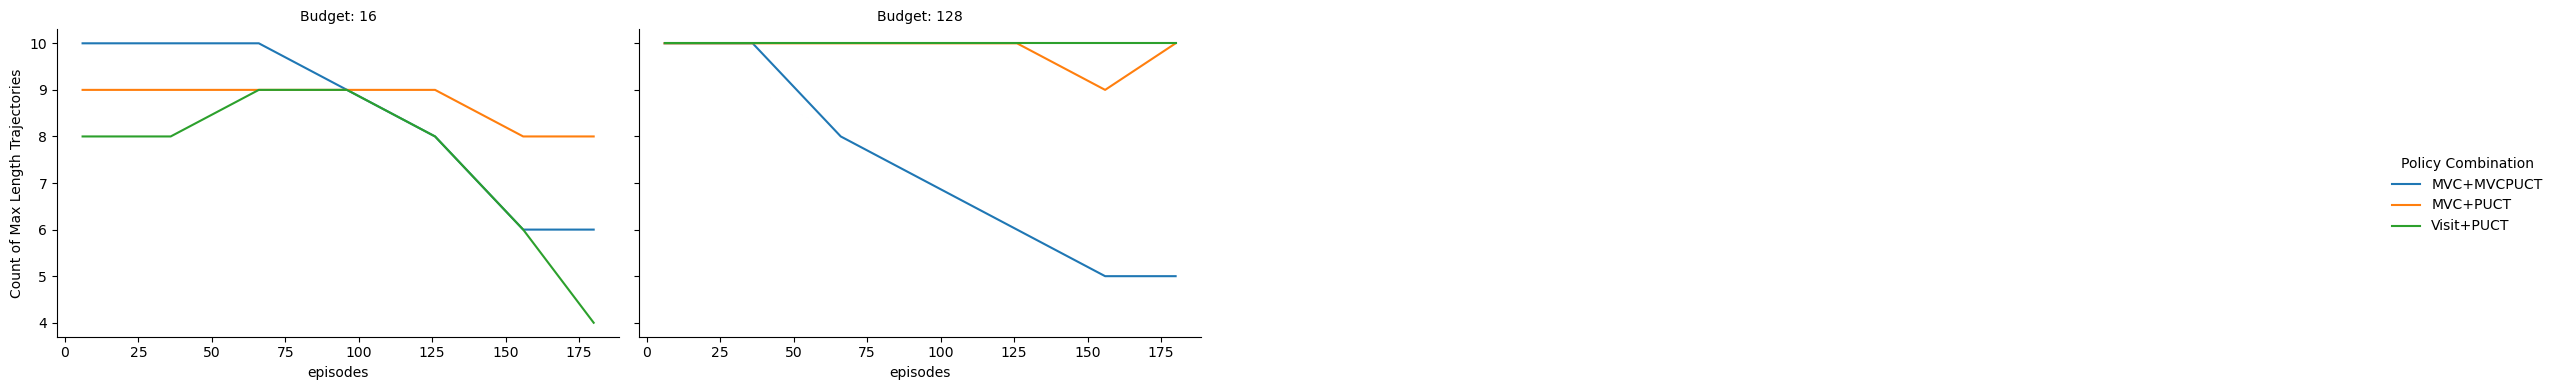

In [65]:
# Set up a FacetGrid for the line plots
g = sns.FacetGrid(data=aggregated_data, col="planning_budget", hue="policy_combination", col_wrap=4, height=4, aspect=1.5)

# Map the lineplot to the FacetGrid
g.map(sns.lineplot, x_metric, 'max_length_reached')

# Adding customizations
g.add_legend(title="Policy Combination")
g.set_titles("Budget: {col_name}")
g.set_axis_labels(x_metric, "Count of Max Length Trajectories")

plt.show()


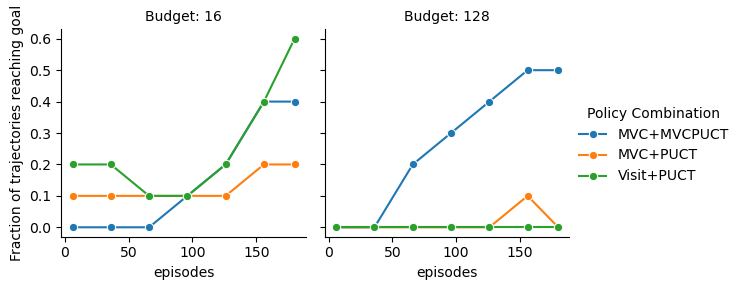

In [66]:
# Assume 'df' is your DataFrame, and you have already added the 'max_length_reached' column
aggregated_data = eval_data.groupby([x_metric, 'policy_combination', 'planning_budget'])['max_length_reached'].apply(lambda x: (x == False).sum() / len(x)).reset_index()
aggregated_data.rename(columns={'max_length_reached': 'count_not_reached'}, inplace=True)
# Set up a FacetGrid for the line plots
g = sns.FacetGrid(data=aggregated_data, col="planning_budget", hue="policy_combination")

# Map the lineplot to the FacetGrid
g.map(sns.lineplot, x_metric, 'count_not_reached', marker='o')

# Adding customizations
g.add_legend(title="Policy Combination")
g.set_titles("Budget: {col_name}")
g.set_axis_labels(x_metric, "Fraction of trajectories reaching goal")
plt.savefig(f"{save_folder}/{env_description}_reachgoal.pdf")
plt.show()
